In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import random
import scipy.stats as st
from matplotlib import pyplot as plot
data=pd.read_csv('operations.csv',parse_dates=[0])
groceries=data[data.categ=="GROCERIES"]
groceries.sort_values("transaction_date")
groceries["amount"]=-groceries["amount"]
r=[]
def number_day_month(num):
    if num in [1,3,5,7,8,10,12]:
        return 31
    elif num in [4,6,8,9,11]:
        return 30
    else:
        return 28 
last_date=dt.datetime.now()
last_day=last_date.strftime("%d")    
last_month=last_date.strftime("%m")    
for i,row in groceries.iterrows():
    month=row["month"]
    day=row["day"]
    if month==last_month:
        r.append(day-last_day)
    else:
        r.append((number_day_month(last_month)-int(last_day))+day+(month-int(last_month)-1)*30)
    last_day=row["day"]
    last_month=row["month"]
r[0]=0
groceries['wait']=r
groceries=groceries.iloc[1:,]
a=groceries.groupby('transaction_date')['amount'].sum()
b=groceries.groupby('transaction_date')['wait'].first()
wait_amount_groceries=pd.DataFrame([a for a in zip(a,b)])
wait_amount_groceries.to_csv("grocerie.csv")
wait_amount_groceries

C:\Users\Pro\miniconda3\envs\fromscratch\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pro\miniconda3\envs\fromscratch\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1
0,42.42,5
1,32.67,15
2,1.90,1
3,9.11,2
4,12.24,4
5,17.16,2
6,3.48,1
7,42.45,5
8,46.51,5
9,4.41,8


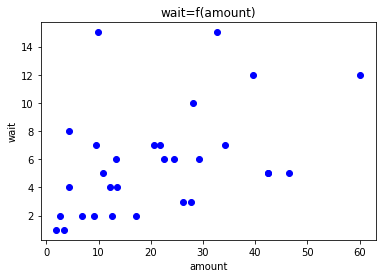

In [3]:
plot.scatter(wait_amount_groceries[0],wait_amount_groceries[1],c='blue')
plot.xlabel("amount")
plot.ylabel('wait')
plot.title('wait=f(amount)')
plot.show()

In [4]:
#estimate a and b for the lenear regression
import statsmodels.api as sm

Y = groceries[['amount']]
X = groceries[['wait']]
X=X.copy()
Y["intercept"]=1.

# X = X.copy() # X will be modified, so a copy is created
# Y['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares 
#a,b = result.params['wait'],result.params['intercept']
a,b = result.params[0],result.params[1]
result.params

C:\Users\Pro\miniconda3\envs\fromscratch\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,0,1
wait,2.567119,0.121678


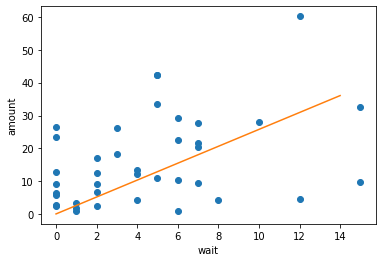

In [96]:
plot.plot(groceries.wait,groceries.amount, "o")
plot.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plot.xlabel("wait")
plot.ylabel("amount")
plot.show()

In [12]:
groceries=groceries[groceries.wait<12]
Y = groceries[['amount']]
X = groceries[['wait']]
X=X.copy()
X["intercept"]=1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Squares
#a,b = result.params['wait'],result.params['intercept']
a,b = result.params[0],result.params[1]
print(a)
print(b)

1.5225788781770362
10.013545135845753


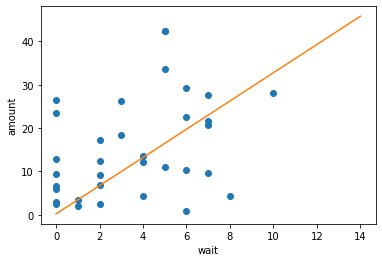

In [10]:
plot.plot(groceries.wait,groceries.amount, "o")
plot.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plot.xlabel("wait")
plot.ylabel("amount")
plot.show()